# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

# Business Exploration Questions

# Notebook Preparation

## Importing Modules

In [34]:
import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV

from sklearn.feature_selection import RFECV, RFE

from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

from sklearn import neighbors
from math import sqrt
import itertools

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

#from sklearn.datasets import make_regression


## Notebook Functions

In [2]:
# determine upper and lower percentile ranges
def percentile(column):
    lower_range = round(column.quantile(q=.005), 2)
    upper_range = round(column.quantile(q=.995), 2)
    return lower_range, upper_range

In [3]:
# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# Preprocessing

## Plan
* Identify unneeded categories
* Drop data outside the 99th percentile to remove outliers
* Locate and deal with null values
* Look for and deal with any unusual data entries
* Confirm our data types and convert any incorrect data types
* separate our continuous from our categorical data
* transform and normalize where needed

In [4]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# looking for outliers in the percentiles

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We see a few outliers, and we have so much data that dropping the outlying 1% will allow us to maintain plenty of data. We're going to keep our middle 99% of data for price, lot size, and square footage.

I also see a possible significant outlier in longitude. We will look at what that means.

We'll also inspect the outlier in bedrooms.

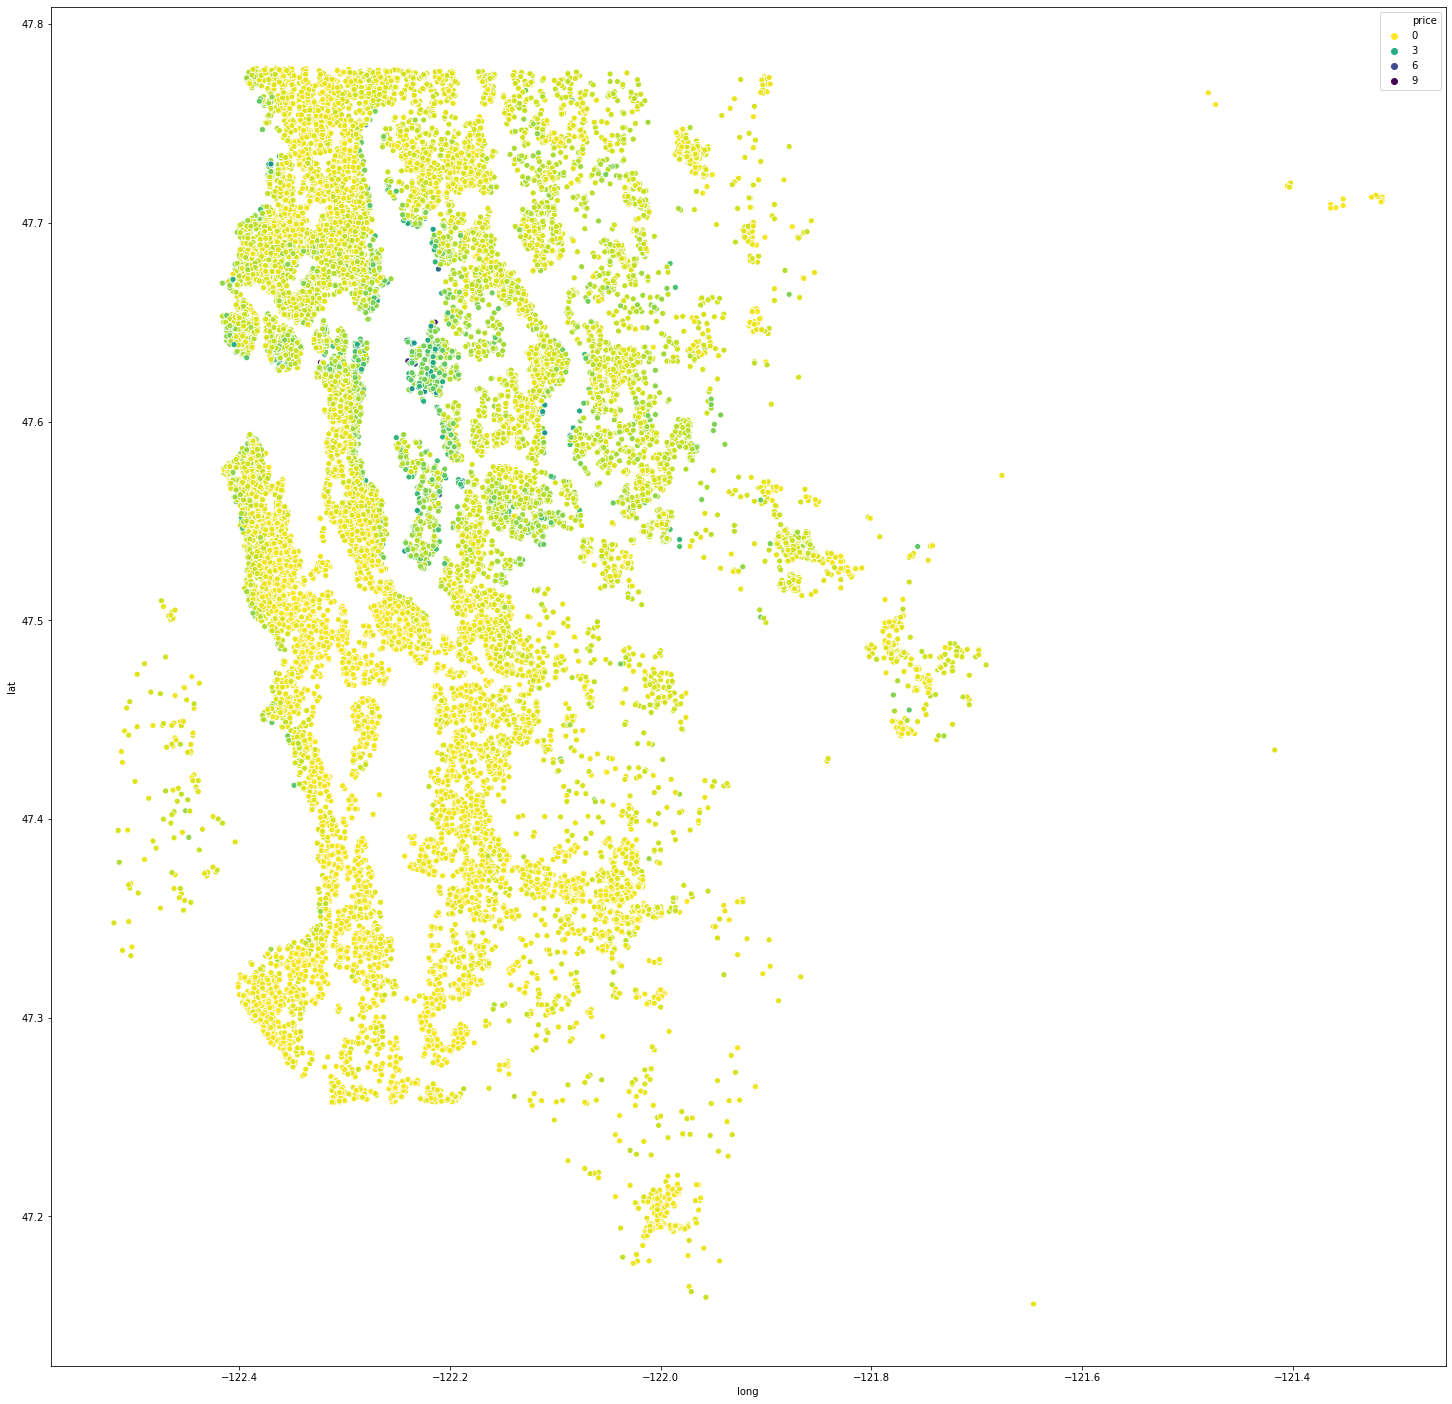

In [8]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="viridis_r");

using latitude and longitude, we basically make a visual map of the King County area. But we can see that there are a few sales in locations that are outliers in some way - possible mis-filed for longitude. I want and need to use location for my model, and sales that are too far outside of our comparison area geographically may add noise to our model. So I'm going to drop the longitude outliers as well. 

In [9]:
# determing our center 99% of data for price, lot size, sq footage and longitude

pricelower,priceupper = percentile(df.price)
lotlower,lotupper = percentile(df.sqft_lot)
sqftlower, sqftupper = percentile(df.sqft_living)
longlower, longupper = percentile(df.long)


# dropping the things outside of our lower and upper range

df.drop(df[ (df.price > priceupper) | (df.price < pricelower) ].index , inplace=True)
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)
df.drop(df[ (df.long > longupper) | (df.long < longlower) ].index , inplace=True)


In [10]:
#check what is going on with the weird bedroom value

df.sort_values('bedrooms', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,2131700900,8/13/2014,283700.0,1,1.75,1010,10900,1.0,0.0,0.0,4,6,1010,0.0,1968,0.0,98019,47.7391,-121.982,1410,8359
19210,2414600366,11/14/2014,199900.0,1,1.00,720,7140,1.0,0.0,0.0,3,6,720,0.0,1930,0.0,98146,47.5119,-122.339,1140,7577
17893,726059047,12/16/2014,310000.0,1,1.00,920,8282,1.5,0.0,0.0,3,6,920,0.0,1944,NaN,98011,47.7610,-122.214,2260,14025
1387,4102000075,5/22/2014,275000.0,1,0.75,1170,14149,1.0,0.0,0.0,5,7,880,290.0,1962,0.0,98022,47.2653,-121.910,1130,24513


In [11]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

# 11 bedrooms in 3000sf, 10 bedrooms in 2920sf, 10 bedrooms in 3610sf are also obviously mistakes
# We're going to impute the mean into the fields for 10 and 11 bedrooms as well.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 11.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 10.0, 'bedrooms'] = bedroom_mean

df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outliers by imputing the mean
# I remain suspicious of these 9-bedroom entries, but we'll decline from manipulating them further

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16830,8823900290,3/17/2015,1400000.0,9.0,4.00,4620,5508,2.5,0.0,0.0,3,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320
4231,2902200015,1/6/2015,700000.0,9.0,3.00,3680,4400,2.0,0.0,0.0,3,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
18428,8823901445,3/13/2015,934000.0,9.0,3.00,2820,4480,2.0,0.0,0.0,3,7,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400
4092,1997200215,5/7/2014,599999.0,9.0,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
8537,424049043,8/11/2014,450000.0,9.0,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,2131700900,8/13/2014,283700.0,1.0,1.75,1010,10900,1.0,0.0,0.0,4,6,1010,0.0,1968,0.0,98019,47.7391,-121.982,1410,8359
19210,2414600366,11/14/2014,199900.0,1.0,1.00,720,7140,1.0,0.0,0.0,3,6,720,0.0,1930,0.0,98146,47.5119,-122.339,1140,7577
17893,726059047,12/16/2014,310000.0,1.0,1.00,920,8282,1.5,0.0,0.0,3,6,920,0.0,1944,NaN,98011,47.7610,-122.214,2260,14025
1387,4102000075,5/22/2014,275000.0,1.0,0.75,1170,14149,1.0,0.0,0.0,5,7,880,290.0,1962,0.0,98022,47.2653,-121.910,1130,24513


In [12]:
df

# confirming we still have around 20k entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3.0,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [13]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2297
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3703
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [15]:
# we've removed the null values from our three binary columns

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 9828200460    0.000096
7853400250    0.000096
4435000705    0.000096
3293700496    0.000096
1721801010    0.000096
Name: id, dtype: float64 


date 
 6/23/2014    0.006625
6/25/2014    0.006097
6/26/2014    0.006049
4/27/2015    0.005905
7/8/2014     0.005761
Name: date, dtype: float64 


price 
 450000.0    0.008114
350000.0    0.007970
550000.0    0.007442
500000.0    0.007201
425000.0    0.007009
Name: price, dtype: float64 


bedrooms 
 3.0    0.459792
4.0    0.323491
2.0    0.122858
5.0    0.073023
6.0    0.012099
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.254021
1.00    0.175380
1.75    0.142638
2.25    0.096308
2.00    0.090355
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006385
1400    0.006289
1440    0.006289
1660    0.006193
1800    0.006145
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.017092
6000    0.013587
4000    0.011906
7200    0.010418
4800    0.005569
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.496903
2.0    0.3802

In [18]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])


# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold
df['month'] = pd.DatetimeIndex(df['date']).month

In [19]:
# data types are now fixed

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
dtype: object

In [20]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

In [21]:
# We're trying out engineering a feature that penalizes or rewards being the smallest or biggest
# property in the neighborhood, as generally you don't want to be either. This is attempting 
# to impose a categorical relationship on how the property relates to its neighbors

df['comparative_sf'] = 0
df.loc[df['sqft_living'] <= (df['sqft_living15']*.75), 'comparative_sf'] = 'smaller'
df.loc[(df['sqft_living'] > (df['sqft_living15']*.75)) | (df['sqft_living'] < (df['sqft_living15']*1.25)), 'comparative_sf'] = 'average'
df.loc[df['sqft_living'] >= (df['sqft_living15']*1.25), 'comparative_sf'] = 'larger'

df['comparative_lot'] = 0
df.loc[df['sqft_lot'] <= (df['sqft_lot15']*.75), 'comparative_lot'] = 'smaller'
df.loc[(df['sqft_lot'] > (df['sqft_lot15']*.75)) | (df['sqft_lot'] < (df['sqft_lot15']*1.25)), 'comparative_lot'] = 'average'
df.loc[df['sqft_lot'] >= (df['sqft_lot15']*1.25), 'comparative_lot'] = 'larger'

### Look for Multicollinearity

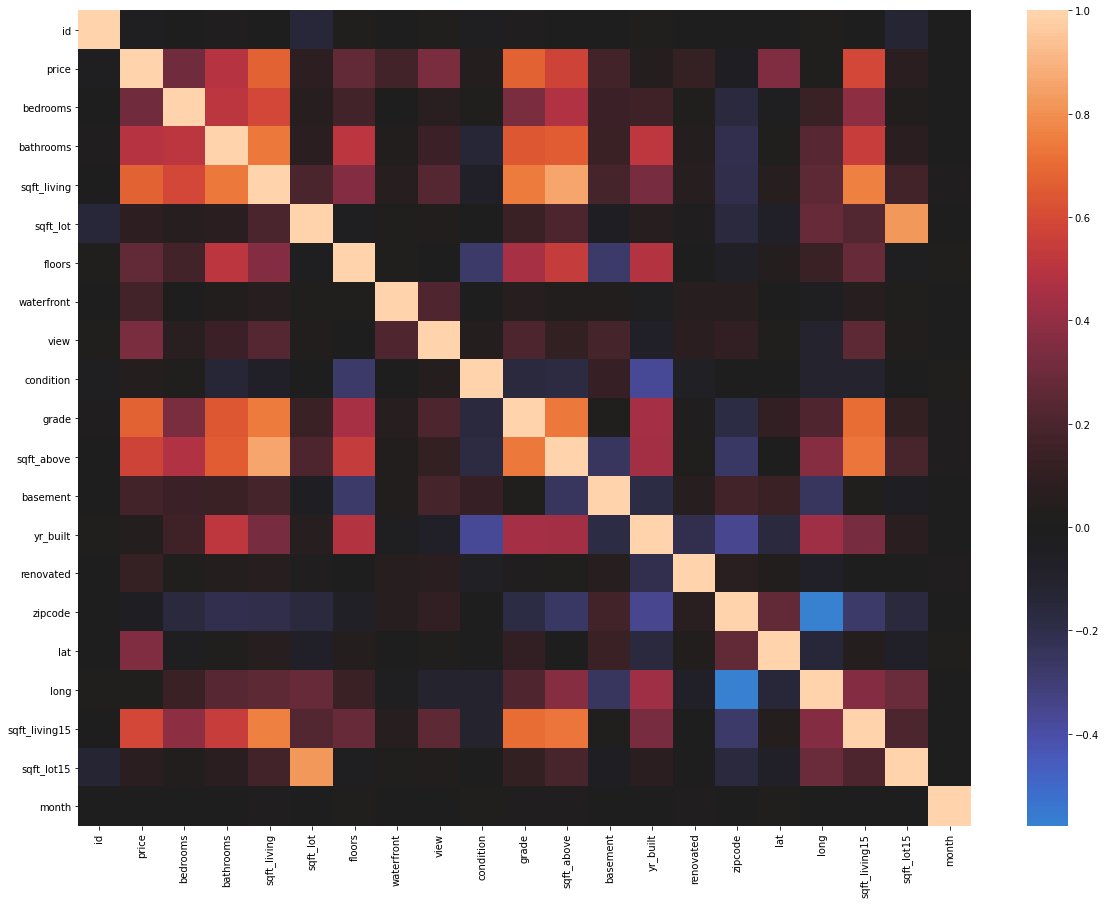

In [23]:
# look for multicollinearity of features
data_pred = df
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [24]:
data_pred.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
id,1.000000,-0.018009,0.000662,0.008740,-0.007455,-0.144259,0.018409,0.006464,0.017836,-0.026472,0.010758,-0.006041,0.002983,0.023307,-0.008489,-0.010578,-0.007738,0.025801,-0.001686,-0.133114,-0.010788
price,-0.018009,1.000000,0.305318,0.492138,0.668353,0.090673,0.269507,0.178007,0.339983,0.039542,0.669158,0.568697,0.169408,0.040674,0.119688,-0.037436,0.356227,0.024499,0.591639,0.074160,-0.017024
bedrooms,0.000662,0.305318,1.000000,0.511400,0.591256,0.052894,0.176265,-0.008000,0.068567,0.016740,0.337755,0.476250,0.145661,0.158641,0.016455,-0.153899,-0.022257,0.139908,0.385609,0.038285,-0.001706
bathrooms,0.008740,0.492138,0.511400,1.000000,0.734947,0.080654,0.508326,0.034404,0.146597,-0.136909,0.637918,0.659469,0.139532,0.518011,0.044000,-0.202398,0.014061,0.237463,0.549953,0.071903,0.007380
sqft_living,-0.007455,0.668353,0.591256,0.734947,1.000000,0.201338,0.360833,0.058412,0.234698,-0.068991,0.745456,0.860689,0.184978,0.330768,0.046852,-0.197844,0.044884,0.259805,0.755200,0.177078,0.011364
sqft_lot,-0.144259,0.090673,0.052894,0.080654,0.201338,1.000000,-0.033087,0.017830,0.034826,-0.009961,0.134135,0.208185,-0.038139,0.061181,0.010184,-0.158504,-0.071851,0.289518,0.219017,0.815304,0.001157
floors,0.018409,0.269507,0.176265,0.508326,0.360833,-0.033087,1.000000,0.018645,0.005491,-0.270797,0.456934,0.541272,-0.270598,0.487363,0.004840,-0.062181,0.039957,0.135250,0.281504,-0.027055,0.015763
waterfront,0.006464,0.178007,-0.008000,0.034404,0.058412,0.017830,0.018645,1.000000,0.211480,0.006643,0.055916,0.036739,0.027486,-0.024914,0.058349,0.049050,-0.010552,-0.026886,0.058869,0.021400,-0.001605
view,0.017836,0.339983,0.068567,0.146597,0.234698,0.034826,0.005491,0.211480,1.000000,0.042223,0.209401,0.112931,0.183642,-0.074166,0.080091,0.109601,0.016202,-0.098034,0.252705,0.033264,-0.010337
condition,-0.026472,0.039542,0.016740,-0.136909,-0.068991,-0.009961,-0.270797,0.006643,0.042223,1.000000,-0.159355,-0.174007,0.130599,-0.366308,-0.056886,0.006252,-0.012328,-0.105423,-0.103140,-0.002455,0.022861


In [25]:
#Get our list of highly correlated feature pairs with following steps:

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.75]


,level_0,level_1,correlation
pairs,,,
"(sqft_living, sqft_above)",sqft_living,sqft_above,0.860689
"(sqft_above, sqft_living)",sqft_above,sqft_living,0.860689
"(sqft_lot15, sqft_lot)",sqft_lot15,sqft_lot,0.815304
"(sqft_lot, sqft_lot15)",sqft_lot,sqft_lot15,0.815304
"(sqft_living15, sqft_living)",sqft_living15,sqft_living,0.755200
"(sqft_living, sqft_living15)",sqft_living,sqft_living15,0.755200


we're going to drop sqft_above, sqft_living15, and sqftlot_15 and just keep the base sqft_living and sqft_lot.


In [26]:
df.reset_index(drop=True, inplace=True)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'basement', 'yr_built', 'renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'month', 'comparative_sf',
       'comparative_lot'],
      dtype='object')

In [28]:
df_cleaned = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 
                'grade', 'basement', 'yr_built', 'renovated', 'zipcode', 'month', 'comparative_sf','comparative_lot']]

df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,basement,yr_built,renovated,zipcode,month,comparative_sf,comparative_lot
0,221900.0,3.0,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,10,average,average
1,538000.0,3.0,2.25,2570,7242,2.0,0.0,3,7,1.0,1951,1.0,98125,12,larger,average
2,180000.0,2.0,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2,average,average
3,604000.0,4.0,3.00,1960,5000,1.0,0.0,5,7,1.0,1965,0.0,98136,12,larger,average
4,510000.0,3.0,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,2,average,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,360000.0,3.0,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0.0,98103,5,average,average
20825,400000.0,4.0,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0.0,98146,2,larger,average
20826,402101.0,2.0,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0.0,98144,6,average,average
20827,400000.0,3.0,2.50,1600,2388,2.0,0.0,3,8,0.0,2004,0.0,98027,1,average,larger


We dropped:
* ID - just a home id
* Date - we extracted Month for our use
* View - according to the file, just means the house was viewed
* sqft_above - correlated with sqft_living
* sqft_lot15 - correlated with sqft_lot
* sqft_living15 - correlated with sqft_living
* lat - did not use
* long - eliminated outliers with long, but no longer used

## Study of variables

### Separate pre-processing categories

In [145]:
# prepare our categories for data transformation by separating into our data types -
# ordinal, continuous, categorical/dichotomous, and need to be binned/further processed

target = ['price']
categorical = ['price', 'yr_built', 'month', 'zipcode', 'waterfront', 'renovated','basement', 'comparative_sf', 'comparative_lot']  
continuous = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition', 'grade']

### Target Variable

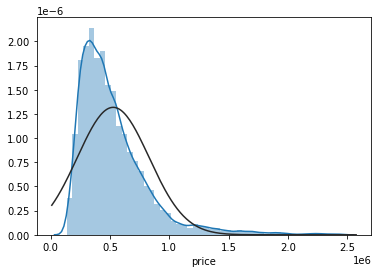

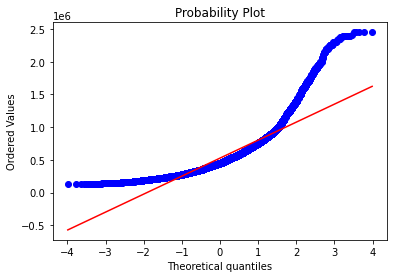

In [122]:
#histogram and normal probability plot
sns.distplot(df_cleaned['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_cleaned['price'], plot=plt)

# our sales price histogram is positively skewed and has a high peak

In [123]:
#skewness and kurtosis
print("Skewness: %f" % df_cleaned['price'].skew())
print("Kurtosis: %f" % df_cleaned['price'].kurt())

Skewness: 2.109356
Kurtosis: 6.617151


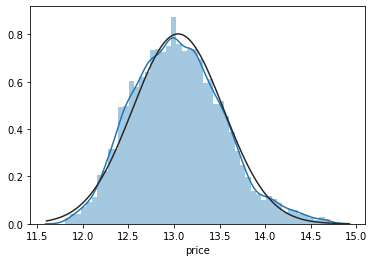

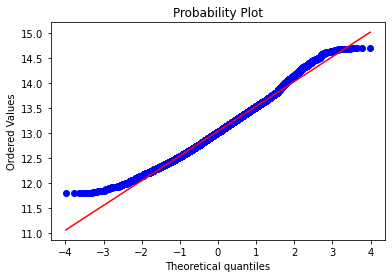

In [124]:
# log transform our target price 
df_target_log = np.log(df_cleaned['price'])

#histogram and normal probability plot
sns.distplot(df_target_log, fit=norm);
fig = plt.figure()
res = stats.probplot(df_target_log, plot=plt)

# Our target price is more normally distributed now

### Categoricals

In [125]:
df_categoricals = df_cleaned[categorical]

df_categoricals

,price,yr_built,month,zipcode,waterfront,renovated,basement,comparative_sf,comparative_lot
0,221900.0,1955,10,98178,0.0,0.0,0.0,average,average
1,538000.0,1951,12,98125,0.0,1.0,1.0,larger,average
2,180000.0,1933,2,98028,0.0,0.0,0.0,average,average
3,604000.0,1965,12,98136,0.0,0.0,1.0,larger,average
4,510000.0,1987,2,98074,0.0,0.0,0.0,average,average
...,...,...,...,...,...,...,...,...,...
20824,360000.0,2009,5,98103,0.0,0.0,0.0,average,average
20825,400000.0,2014,2,98146,0.0,0.0,0.0,larger,average
20826,402101.0,2009,6,98144,0.0,0.0,0.0,average,average
20827,400000.0,2004,1,98027,0.0,0.0,0.0,average,larger


Let's look at mean price by month and see if there are any better insights.

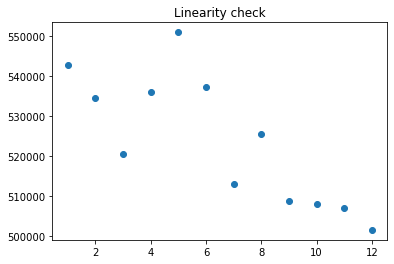

In [126]:
monthly_prices = df_categoricals.groupby('month')['price'].mean()
month = df_categoricals['month'].unique()

plt.scatter(month, monthly_prices)
plt.title("Linearity check")
plt.show()


We're going to bin our month sold into quarters

In [127]:
# group our dataframe by month with average price
monthranks = pd.DataFrame(df_categoricals.groupby('month')['price'].mean())

# set the entries per segment into which to bin our variable
entries = 3

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthranks['quarter'] = np.divmod(np.arange(len(monthranks)),entries)[0]+1

# make a new column on our dataframe. Look up each month entry's segment, and append to the column.
df_categoricals['quarter'] = df_categoricals['month'].apply(lambda x: make_group(x, monthranks, 'quarter'))

In [128]:
# binning our year built into equally sized bins, where each bin has the same number of entries

df_categoricals["year_block"] = pd.qcut(df_categoricals['yr_built'], q=6)

In [129]:
categorical = ['zipcode', 'waterfront', 'renovated', 'basement', 'comparative_sf', 'comparative_lot', 'quarter', 'year_block']

df_categoricals = df_categoricals[categorical]

# tagging all of these things as categoricals
for item in categorical:
    df_categoricals[item] = df_categoricals[item].astype('category')
    
df_categoricals['price'] = df_target

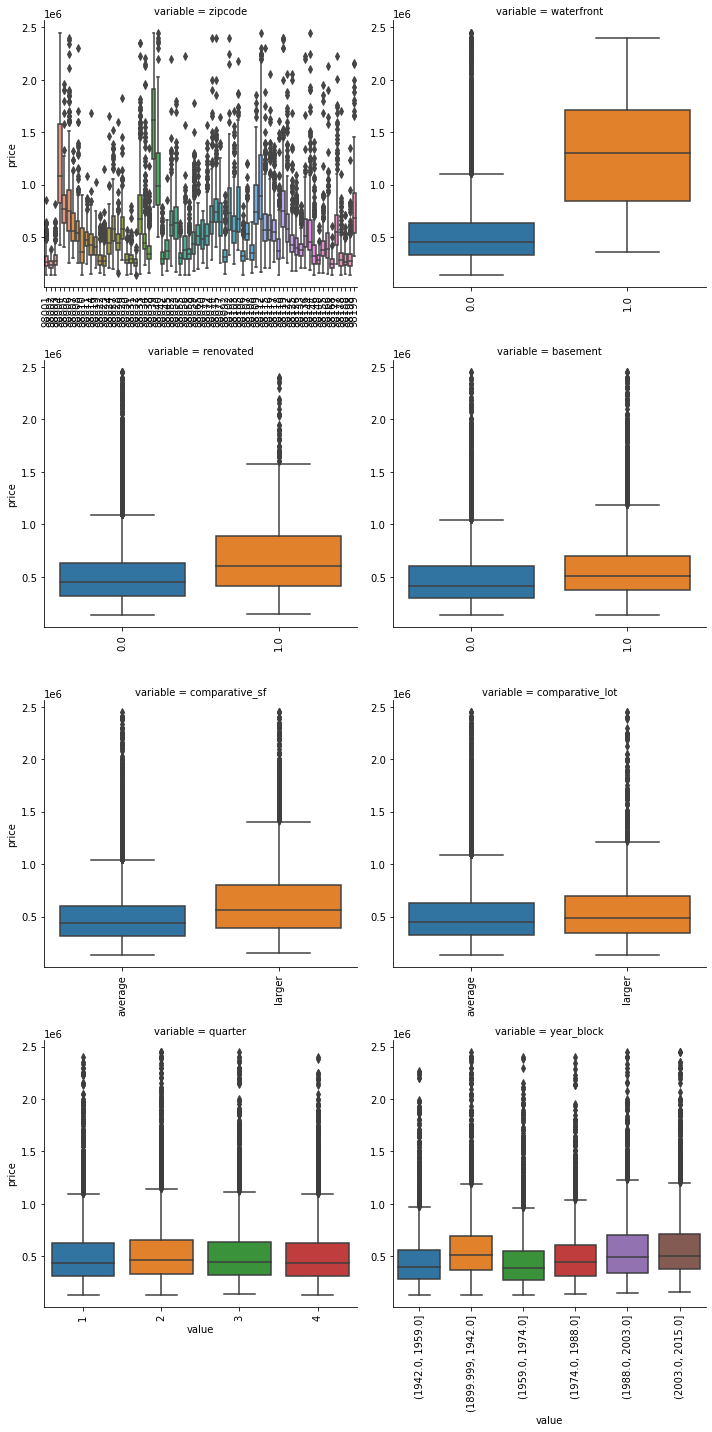

In [130]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_categoricals, id_vars=['price'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [131]:
# make a processed bins file for use with linear regression
df_categoricals_processed = pd.get_dummies(df_categoricals[categorical], prefix=categorical, drop_first=True)

In [132]:
df_categoricals_processed

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1.0,renovated_1.0,basement_1.0,comparative_sf_larger,comparative_lot_larger,quarter_2,quarter_3,quarter_4,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1974.0]","year_block_(1974.0, 1988.0]","year_block_(1988.0, 2003.0]","year_block_(2003.0, 2015.0]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
20825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
20826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
20827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### Continuous/Ordinal

In [180]:
df_continuous = df_cleaned[continuous]

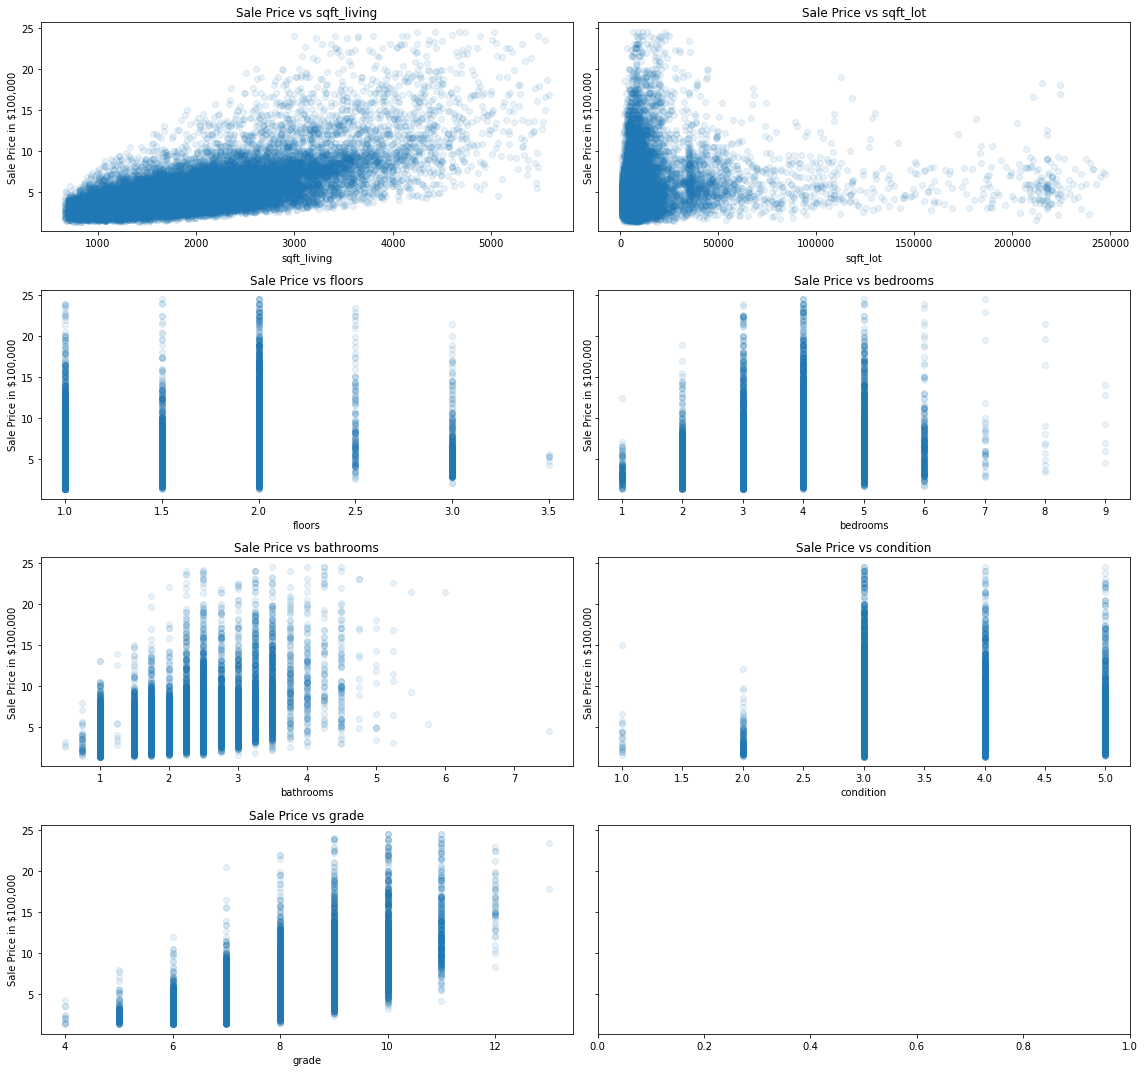

In [181]:
# check linearity

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous.columns):
    ax.scatter(df_continuous[column], df_cleaned['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


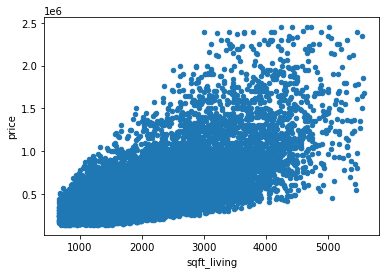

In [182]:
# sqft_living has the strongest and most obvious relationship to price thus far

var = 'sqft_living'
data = pd.concat([df_cleaned['price'], df_continuous[var]], axis=1)
data.plot.scatter(x=var, y='price');


Fun fact - "grade" was not well defined in the features list. I looked it up and found that grade is "	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value." So, it's the quality of building materials, and DEFINITELY worth keeping in our model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B24D7B3D60>,
      dtype=object)

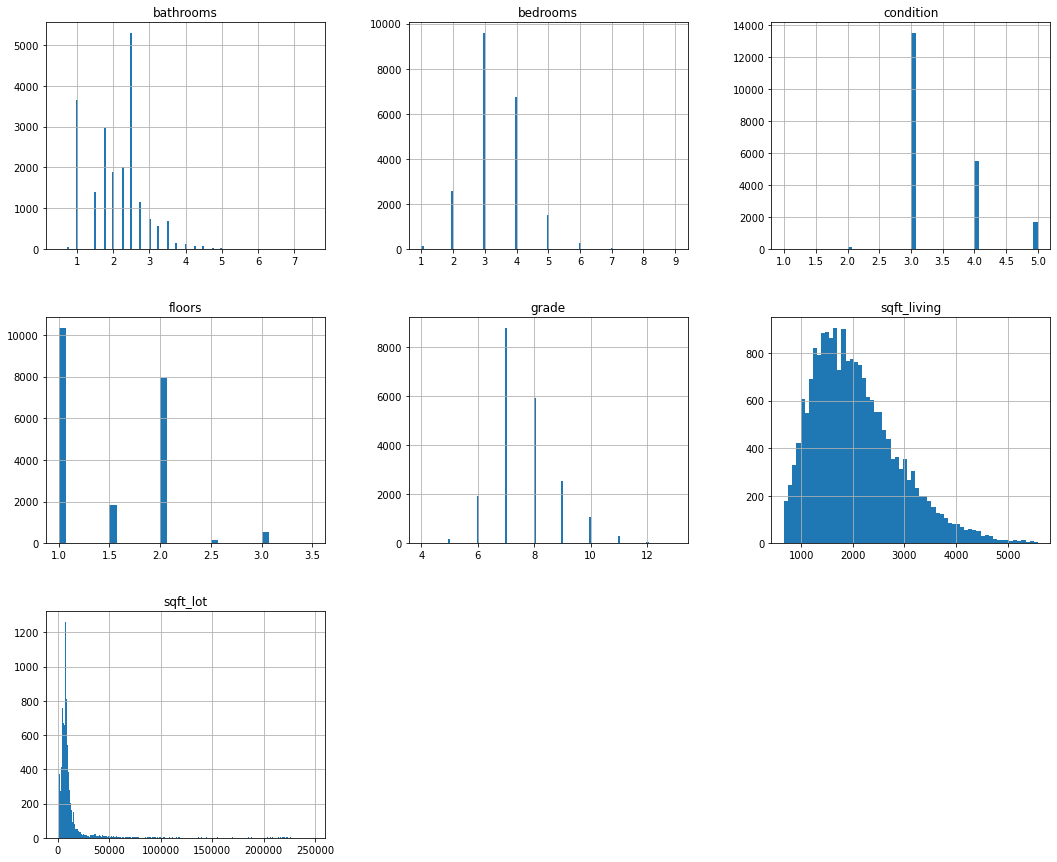

In [183]:
# check how our histograms are looking

df_continuous.hist(figsize=(18,15), bins='auto')


In [184]:
# We're going to transform and standardize all of these.

# log features
log_names = [f'{column}' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names

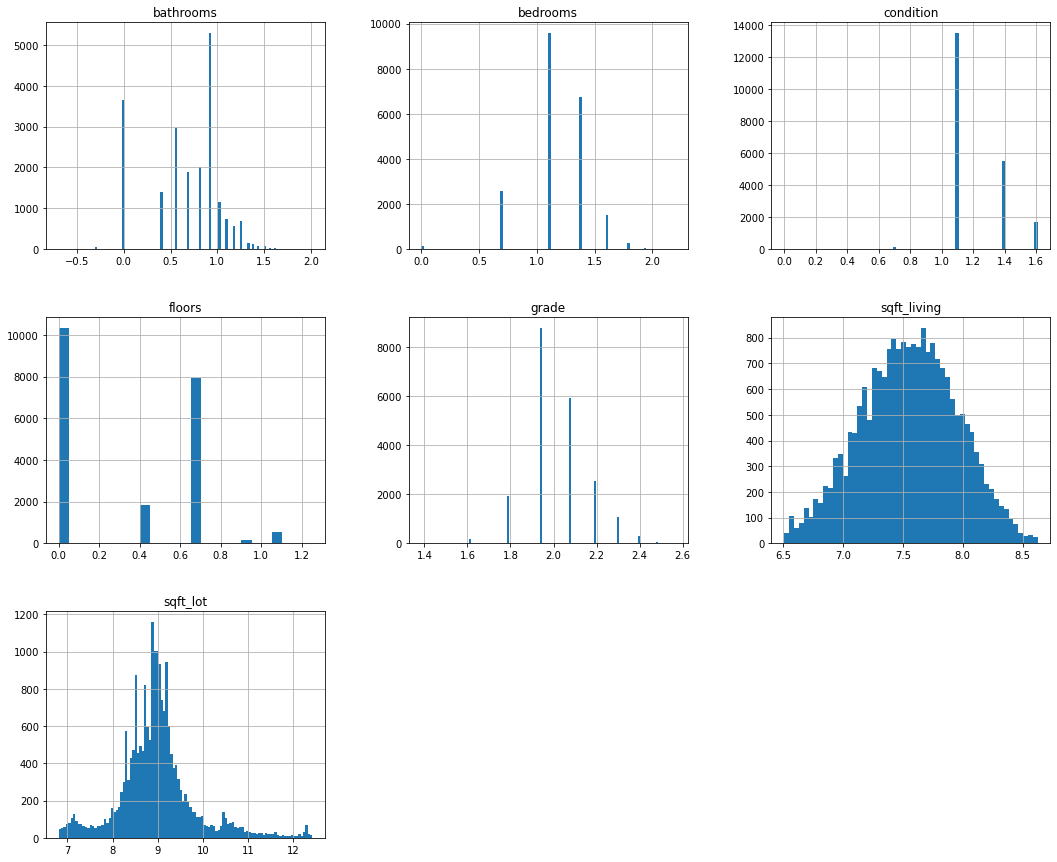

In [185]:
# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks more normal

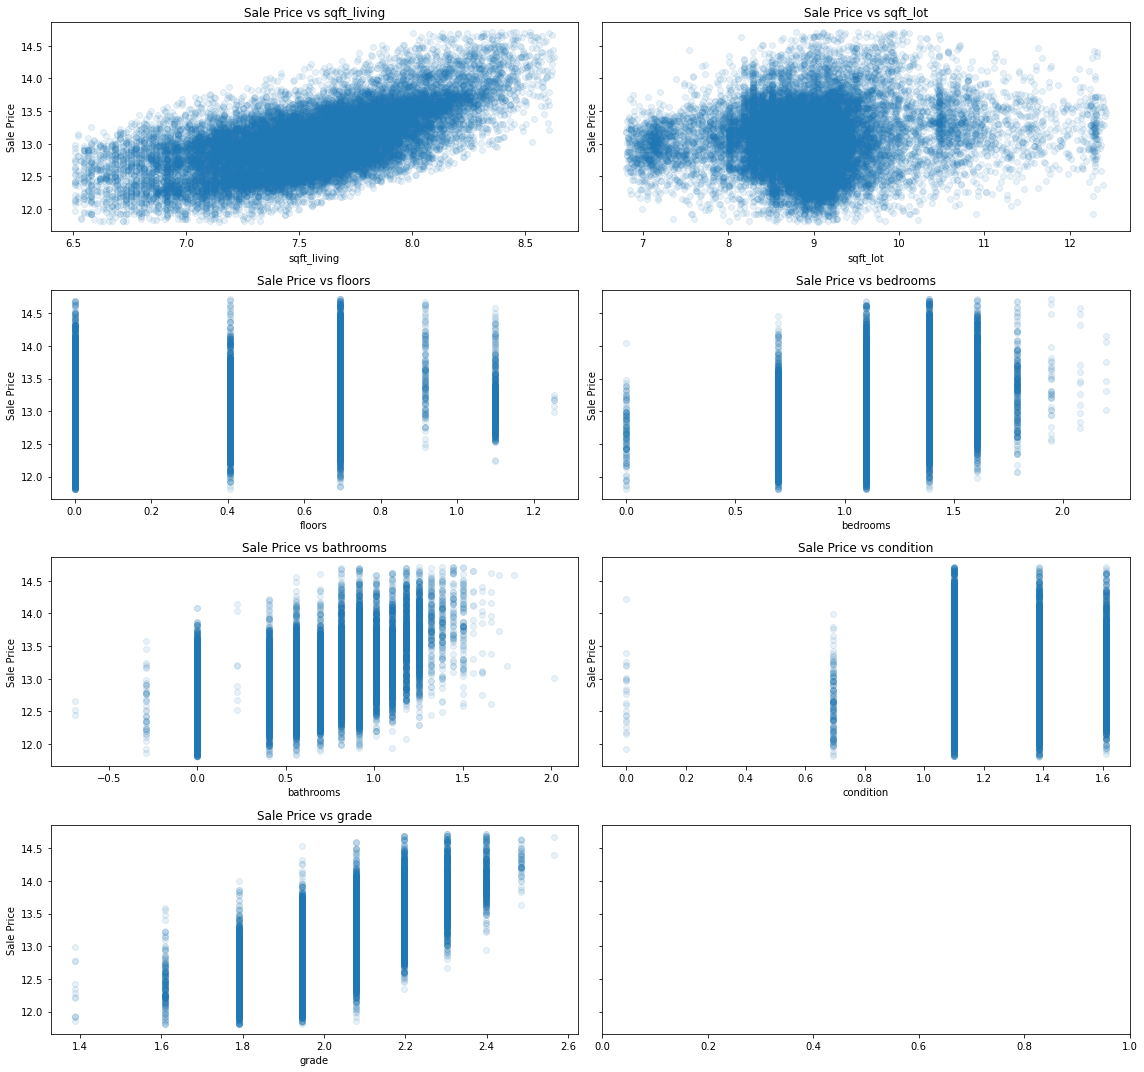

In [186]:
# let's check linearity of these features with our target data

# check linearity

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous_log.columns):
    ax.scatter(df_continuous_log[column], df_target_log, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price')

fig.tight_layout()

In [187]:
# normalize with scikit-learn StandardScaler

scaler = StandardScaler()

#df_standardized = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous_log.columns)
df__continuous_standardized = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous.columns)

In [188]:
df__continuous_standardized

,sqft_living,sqft_lot,floors,bedrooms,bathrooms,condition,grade
0,-1.185273,-0.387367,-0.956580,-0.308940,-1.762937,-0.626213,-0.547037
1,0.744801,-0.088597,1.017377,-0.308940,0.348304,-0.626213,-0.547037
2,-2.243748,0.299772,-0.956580,-1.795746,-1.762937,-0.626213,-1.628370
3,0.072934,-0.534461,-0.956580,0.745965,1.097279,2.210877,-0.547037
4,-0.309293,0.043185,-0.956580,-0.308940,0.041658,-0.626213,0.389656
...,...,...,...,...,...,...,...
20824,-0.541197,-2.323332,2.172067,-0.308940,0.622608,-0.626213,0.389656
20825,0.480334,-0.353136,1.017377,0.745965,0.622608,-0.626213,0.389656
20826,-1.546575,-2.110302,1.017377,-1.795746,-2.511912,-0.626213,-0.547037
20827,-0.430272,-1.423858,1.017377,-0.308940,0.622608,-0.626213,0.389656


## Final Prep for Linear Regression

Our dataframes to combine:
* df_target_log - log transformed target variable (price)
* df_categoricals_processed - one-hot encoded categoricals
* df__continuous_standardized - standardized continuous

In [189]:
# leave out zip_poly, it did NOT improve our model over one-hot-encoding all 70 zips

preprocessed_scaled = pd.concat([df_target_log, df__continuous_standardized, df_categoricals_processed], axis=1)

In [190]:
# preprocessed data ready for linear regression algorithm

preprocessed_scaled

,price,sqft_living,sqft_lot,floors,bedrooms,bathrooms,condition,grade,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1.0,renovated_1.0,basement_1.0,comparative_sf_larger,comparative_lot_larger,quarter_2,quarter_3,quarter_4,"year_block_(1942.0, 1959.0]","year_block_(1959.0, 1974.0]","year_block_(1974.0, 1988.0]","year_block_(1988.0, 2003.0]","year_block_(2003.0, 2015.0]"
0,12.309982,-1.185273,-0.387367,-0.956580,-0.308940,-1.762937,-0.626213,-0.547037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,13.195614,0.744801,-0.088597,1.017377,-0.308940,0.348304,-0.626213,-0.547037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0
2,12.100712,-2.243748,0.299772,-0.956580,-1.795746,-1.762937,-0.626213,-1.628370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13.311329,0.072934,-0.534461,-0.956580,0.745965,1.097279,2.210877,-0.547037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,13.142166,-0.309293,0.043185,-0.956580,-0.308940,0.041658,-0.626213,0.389656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20824,12.793859,-0.541197,-2.323332,2.172067,-0.308940,0.622608,-0.626213,0.389656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
20825,12.899220,0.480334,-0.353136,1.017377,0.745965,0.622608,-0.626213,0.389656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
20826,12.904459,-1.546575,-2.110302,1.017377,-1.795746,-2.511912,-0.626213,-0.547037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
20827,12.899220,-0.430272,-1.423858,1.017377,-0.308940,0.622608,-0.626213,0.389656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [191]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [192]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

# Models

Steps:
* Divide data into a train/validation set and a test set
* Train our model on the train/validation set
* Validate our model using cv on the train/validation set
* Test our model on our test set

In [193]:
models = {}
models['Models'] = []
models['r2'] = []
models['mae'] = []

## Base Linear Regression Model

Run a base model with no cross-validation or specific feature selection to see our base model scores.

In [194]:
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1252.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:59:02   Log-Likelihood:                 5004.0
No. Observations:               16663   AIC:                            -9828.
Df Residuals:                   16573   BIC:                            -9133.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.6712      0.013   1009.199      0.000      12.647      12.696
sqft_living                     0.2016      0.003     60.071      0.000       0.195       0.208
sqft_lot                        0.0674      0.002     29.145      0.000       0.063       0.072
floors                         -0.0087      0.002     -3.724      0.000      -0.013      -0.004
bedrooms                       -0.0168      0.002     -8.764      0.000      -0.021      -0.013
bathrooms                       0.0195      0.003      7.556      0.000       0.014       0.025
condition                       0.0318      0.002     19.955      0.000       0.029       0.035
grade                           0.1217      0.002     49.179      0.000       0.117       0.127
zipcode_98002                  -0.0102      0.018     -0.569      0.569      -0.045       0.025
zipcode_98003                   0.0246      0.016      1.533      0.125      -0.007       0.056
zipcode_98004                   1.1166      0.017     67.658      0.000       1.084       1.149
zipcode_98005                   0.7443      0.019     39.081      0.000       0.707       0.782
zipcode_98006                   0.6776      0.014     46.892      0.000       0.649       0.706
zipcode_98007                   0.6500      0.020     31.983      0.000       0.610       0.690
zipcode_98008                   0.6808      0.016     41.798      0.000       0.649       0.713
zipcode_98010                   0.1849      0.023      7.927      0.000       0.139       0.231
zipcode_98011                   0.4402      0.018     24.309      0.000       0.405       0.476
zipcode_98014                   0.3117      0.023     13.579      0.000       0.267       0.357
zipcode_98019                   0.2939      0.019     15.881      0.000       0.258       0.330
zipcode_98022                   0.0258      0.018      1.430      0.153      -0.010       0.061
zipcode_98023                  -0.0174      0.014     -1.220      0.222      -0.045       0.011
zipcode_98024                   0.3816      0.026     14.481      0.000       0.330       0.433
zipcode_98027                   0.5018      0.015     33.672      0.000       0.473       0.531
zipcode_98028                   0.4063      0.016     24.988      0.000       0.374       0.438
zipcode_98029                   0.5961      0.016     37.459      0.000       0.565       0.627
zipcode_98030                   0.0350      0.016      2.144      0.032       0.003       0.067
zipcode_98031                   0.0642      0.016      3.926      0.000       0.032       0.096
zipcode_98032                   0.0004      0.021      0.017      0.986      -0.041       0.042
zipcode_98033                   0.8094      0.015     55.352      0.000       0.781       0.838
zipcode_980

### Study Residuals

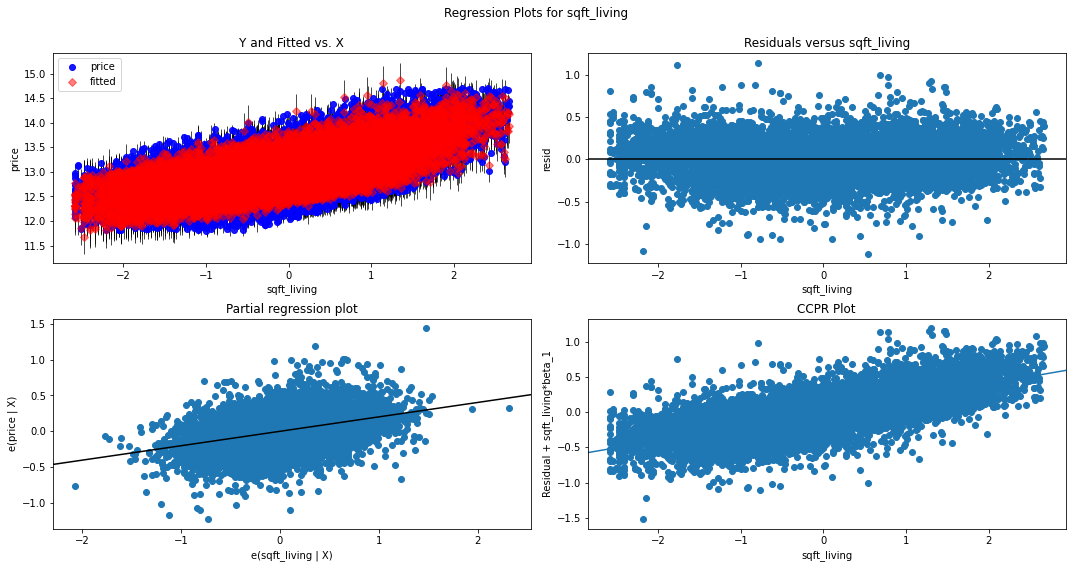

In [195]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

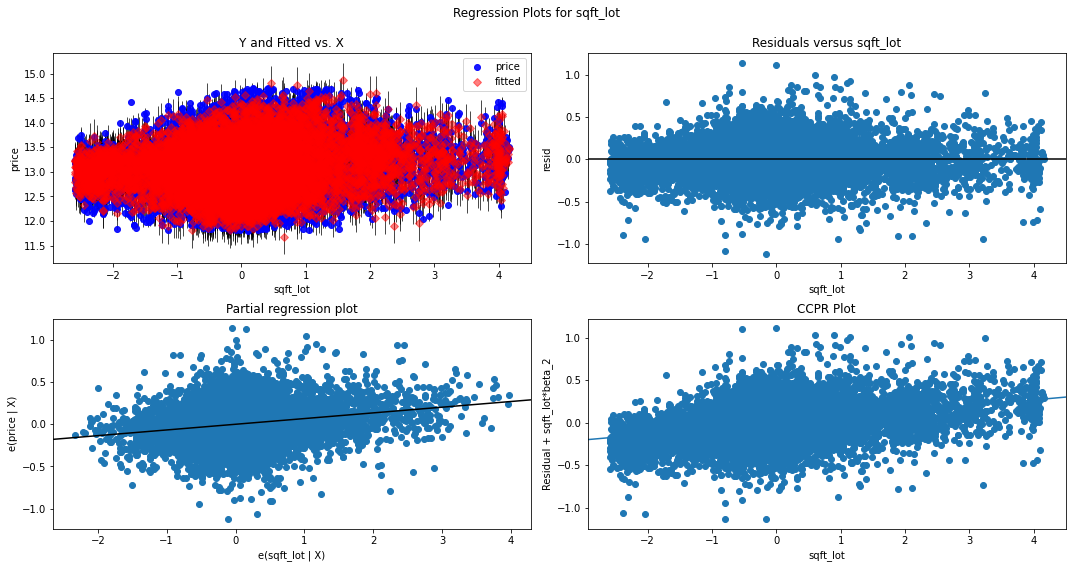

In [196]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

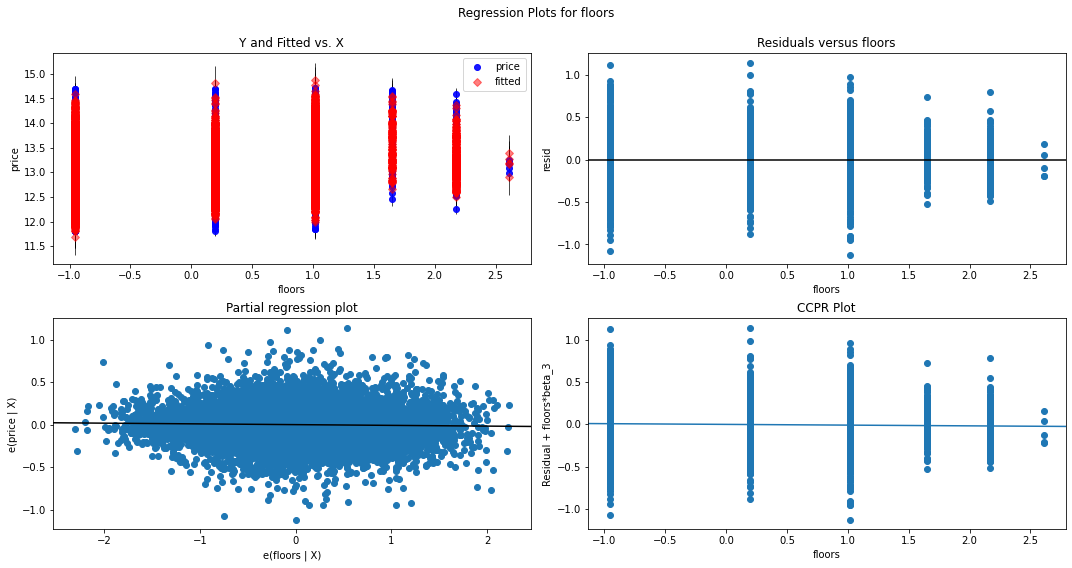

In [197]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

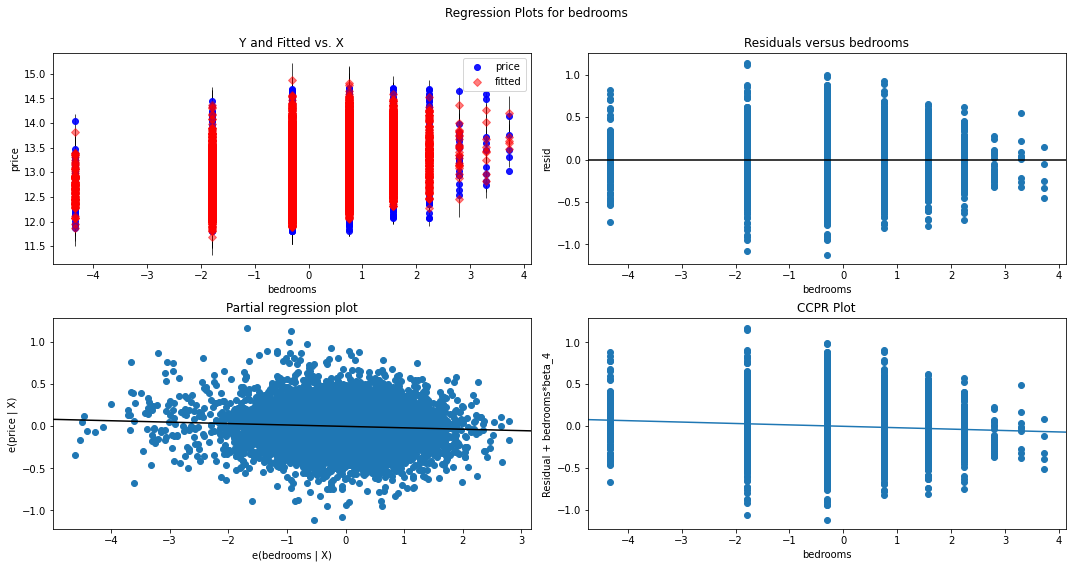

In [198]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

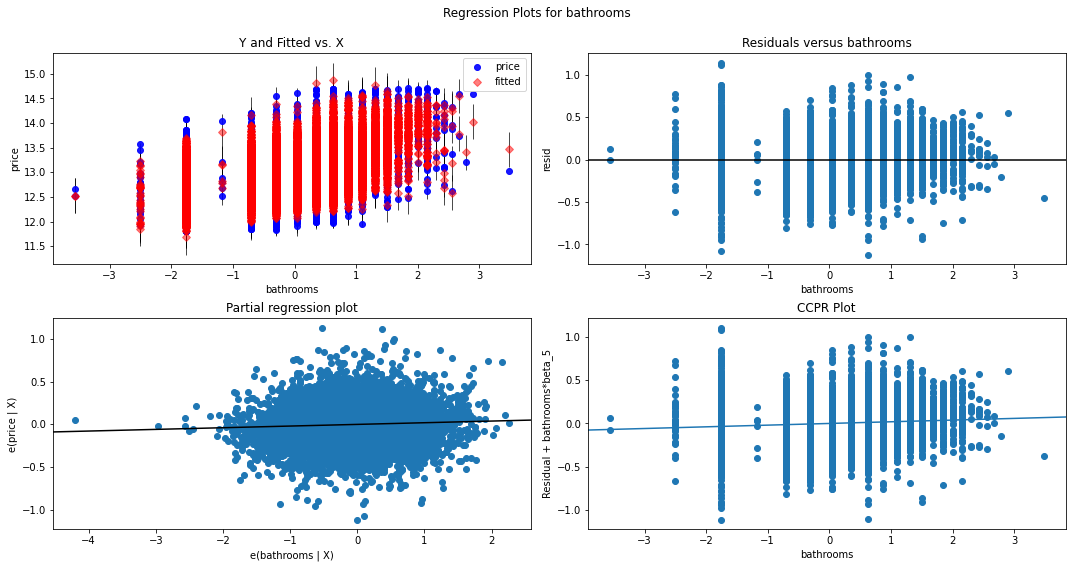

In [199]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

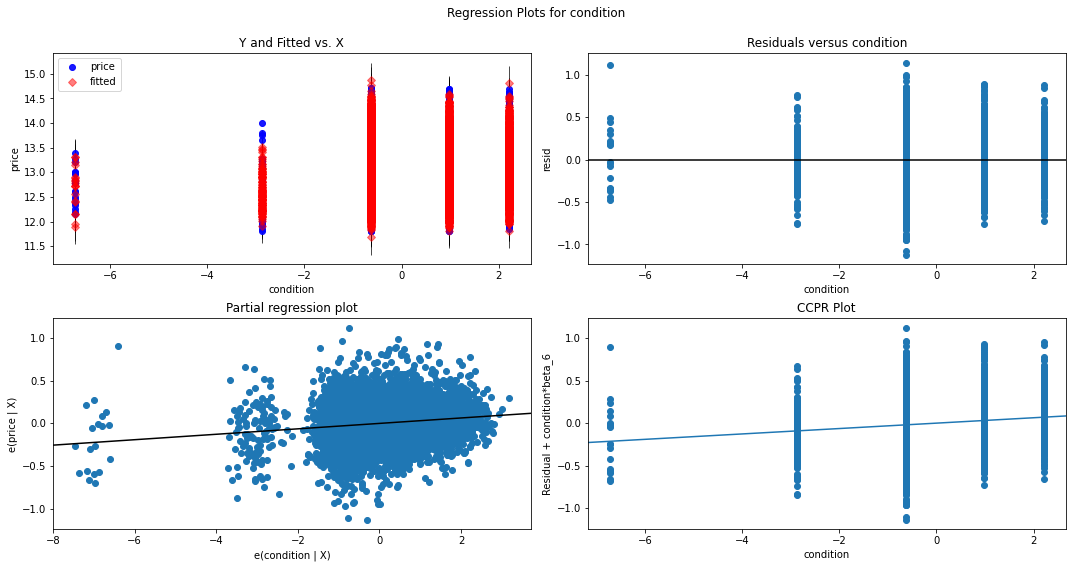

In [200]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

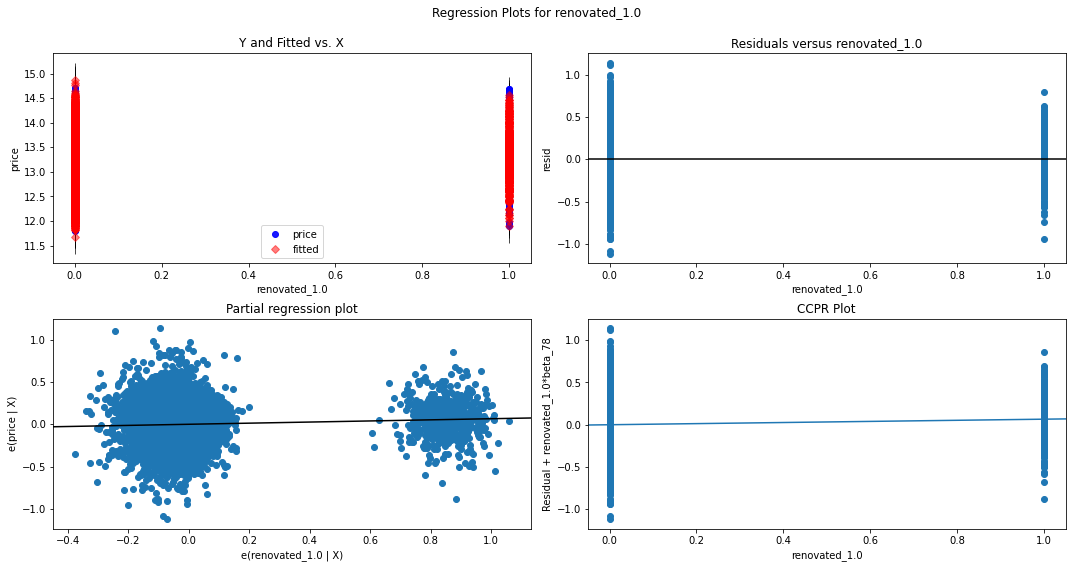

In [201]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

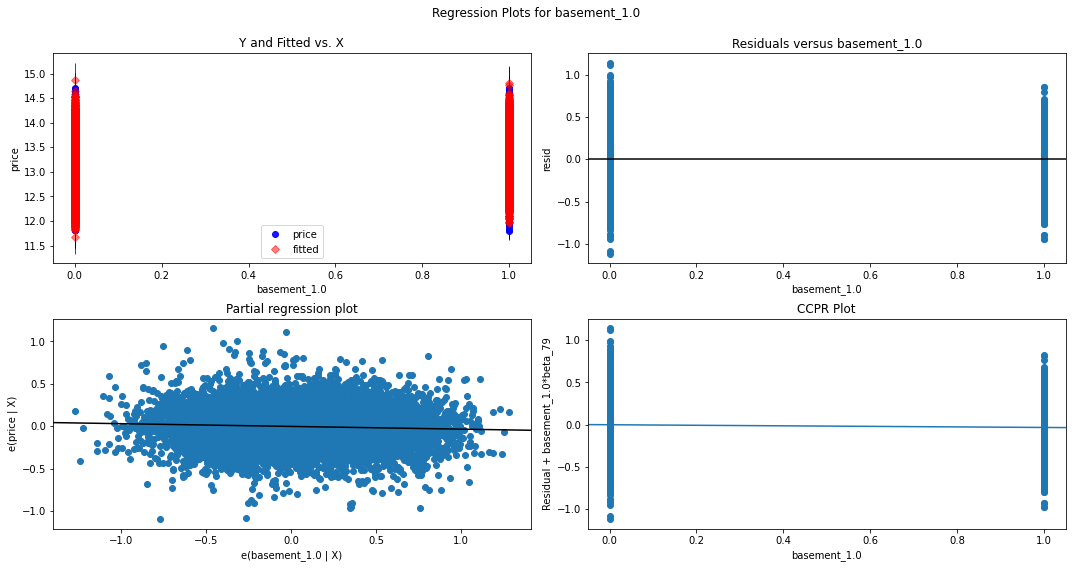

In [202]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

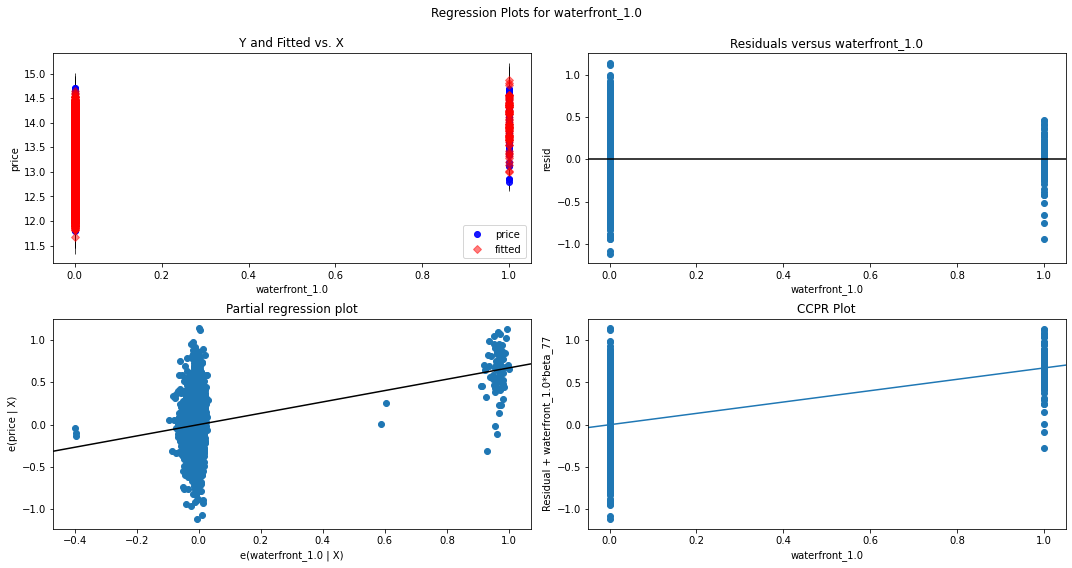

In [203]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

Perform cross-validation with our model over 5 splits and get our mean R^2.

In [204]:
model = LinearRegression()
model.fit(X_train_val, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2


0.868756905507437

In [205]:
# How many predictors are in our base model?
print("{} predictors used for this model".format(X.shape[1]))

89 predictors used for this model


In [206]:
# apply our model to our test set and get predicted values
test_predictions = model.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_basiclr = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_basiclr

,Actual,Predicted
14990,1190000,1296450
7893,474999,280813
8177,452000,516783
15091,2270000,1876399
14188,526500,507995
...,...,...
17617,464000,314259
8594,1330000,1002198
7453,499000,411557
15016,348000,351296


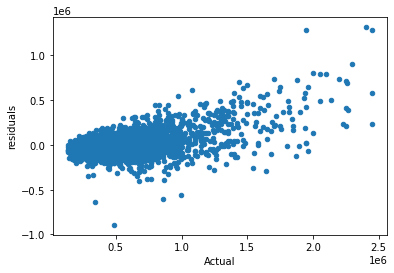

In [207]:
predicted_prices_basiclr["residuals"] = predicted_prices_basiclr["Actual"] - predicted_prices_basiclr["Predicted"]
predicted_prices_basiclr.plot(x = "Actual", y = "residuals",kind = "scatter")

In [208]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

70599.84

In [209]:
models['Models'].append('Basic LR')
models['r2'].append(r2)
models['mae'].append(mae)

### Find/Add Interactions

I wrote a function which finds all of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression with cross validation on 5 folds and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo. 

In [ ]:
def test_feature_combinations(data):
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(data.columns)
    features.remove('price')

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = data['price']
    
    # prepare our x-value with our independent variables. We do a split here in order to run a linear regression to get a
    # base r^2 on our basic model without interactions
    X = data.drop('price', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
    base_score = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv))   
    print("Model base score is ",base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        data['test_interaction'] = data[feat1] * data[feat2]
        # create a new X which includes the test interaction and drops our target value
        X = data.drop('price', axis=1)
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv))
        scores.append(new_score)
        # put feature 1 on a list
        feature1.append(feat1)
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
    
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    
    # return our scoring dataframe to the function
    return scoring_df

In [ ]:
# We ran this script below once and exported the results

interactions_check = pd.concat([df_target_log, df_standardized], axis=1)
interactions_check
scoring_df = test_feature_combinations(interactions_check)

# we're exporting our interactions results to a csv, because we don't need to run it again
scoring_df.to_csv('interactions.csv')

In [ ]:
scoring_df = pd.read_csv('interactions.csv')

scoring_df.sort_values('improvement', ascending=False)

We won't add any interactions.

## Linear Regression - Feature Selectors

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

In [ ]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

#X = preprocessed_scaled.drop('price', axis=1)
#y = preprocessed_scaled['price']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
#actual = np.exp(y_test)

In [ ]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train_val, y_train_val, verbose=True)

print('resulting features:', result)

In [ ]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

predictors_int = sm.add_constant(X_train_refined)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

In [ ]:
print("{} predictors used".format(len(result)))

In [ ]:
model = LinearRegression()
model.fit(X_train_refined, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

In [ ]:
# apply our model to our test set and get predicted values
test_predictions_refined = model.predict(X_test_refined)

# reverse log transform our predicted values
test_predictions_refined_unscaled = np.exp(test_predictions_refined)
test_predictions_refined_unscaled

predicted_prices_forwardstep = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_refined_unscaled.astype(int)})
predicted_prices_forwardstep

In [ ]:
mae = round(mean_absolute_error(test_actual, test_predictions_refined_unscaled), 2)
mae

No change to our model accuracy. The predictors we dropped were clearly trivial.

In [ ]:
models['Models'].append('Forw-Back Selector')
models['r2'].append(r2)
models['mae'].append(mae)

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklean LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

regressor = LinearRegression()
regressor.fit(X_train_val, y_train_val)

perm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train_val)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
# sorted list of relative feature importance via permutation importance

eli = pd.DataFrame(zip(X.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli.tail(30)

In [ ]:
result_eli5 = list(eli[:76][0])
result_eli5

In [ ]:
# Run our linear regression again, using the features recommended by our feature selector

X_eli5 = X_train_val[result_eli5]

predictors_int = sm.add_constant(X_eli5)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()


In [ ]:
model = LinearRegression()
model.fit(X_eli5, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_eli5, y_train_val, cv=5)
r2 = cv_5.mean()
r2

In [ ]:
X_test_eli5 = X_test[result_eli5]

eli5_predictions = model.predict(X_test_eli5)

eli5_predictions_unscaled = np.exp(eli5_predictions)
eli5_predictions_unscaled

predicted_prices_eli5 = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": eli5_predictions_unscaled.astype(int)})
predicted_prices_eli5

In [ ]:
mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)
mae

In [ ]:
models['Models'].append('Permutation Importance')
models['r2'].append(r2)
models['mae'].append(mae)

### Recursive Feature Elimination with Cross Validation - Linear Regression

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='r2')

rfecv.fit(X_train_val, y_train_val)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

dset

In [ ]:
results = pd.DataFrame()
results['attr'] = X.columns
results['used'] = rfecv.support_

rfecv_result = list(dset[(dset['used'] == True)]['attr'])
rfecv_result

In [ ]:
r2 = rfecv.grid_scores_[rfecv.n_features_-1]
r2

In [ ]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_rfecv = X_train_val[rfecv_result]
X_test_rfecv = X_test[rfecv_result]

predictors_int = sm.add_constant(X_train_rfecv)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('R2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
rfecv_predictions = rfecv.predict(X_test)

rfecv_predictions_unscaled = np.exp(rfecv_predictions)
rfecv_predictions_unscaled

predicted_prices_rfecv = pd.DataFrame({"price": test_actual.astype(int), "lr_predicted": rfecv_predictions_unscaled.astype(int)})

predicted_prices_rfecv

In [ ]:
mae = round(mean_absolute_error(test_actual, rfecv_predictions_unscaled), 2)
mae

In [ ]:
models['Models'].append('RFECV')
models['r2'].append(r2)
models['mae'].append(mae)

### Visualizing R2 at different features selected (OLS LR)

In [ ]:
# explore the number of selected features for RFE

# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

# get a list of these_models to evaluate
def get_these_models():
    these_models = dict()
    for i in range(50, 96):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        these_models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return these_models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

these_models = get_these_models()
# evaluate the these_models and store results
results, names = list(), list()
for name, model in these_models.items():
    scores = evaluate_model(model, X_train_val, y_train_val)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Custom LAD Regression Model

Least Absolute Deviations model (uses MAE to optimize model)

In [ ]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [ ]:
model = LADRegression()

model.fit(X_train_val, y_train_val)

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

In [ ]:
predictions_LAD = model.predict(X_test)
predictions_LAD_unscaled = np.exp(predictions_LAD)

In [ ]:
mae = round(mean_absolute_error(test_actual, predictions_LAD_unscaled), 2)
mae

In [ ]:
models['Models'].append('LAD Regression')
models['r2'].append(r2)
models['mae'].append(mae)

## SVR

In [ ]:
# Linear Support vector regression
from sklearn.svm import SVR

svr = SVR()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_val_score(svr, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

In [ ]:
svr.fit(X_train_val, y_train_val)
predictions_SVR = svr.predict(X_test)
predictions_SVR_unscaled = np.exp(predictions_SVR)

In [ ]:
mae = round(mean_absolute_error(test_actual, predictions_SVR_unscaled), 2)
mae

In [ ]:
models['Models'].append('SVR')
models['r2'].append(r2)
models['mae'].append(mae)

## Elastic Net Regression

In [ ]:
# Elastic Net regression

from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005], cv=5, random_state=0)
elasticnet.fit(X_train_val, y_train_val)
r2 = elasticnet.score(X_train_val, y_train_val)
r2

In [ ]:
predictions_elastic = elasticnet.predict(X_test)
predictions_elastic_unscaled = np.exp(predictions_elastic)

In [ ]:
mae = round(mean_absolute_error(test_actual, predictions_elastic_unscaled), 2)
mae

In [ ]:
models['Models'].append('Elastic Net')
models['r2'].append(r2)
models['mae'].append(mae)

## Lasso Regression

In [ ]:
def r2_cv(model):
    r2= np.sqrt(-cross_val_score(model, X_train_val, y_train_val, scoring="r2", cv = 5))
    return(r2)

lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], cv=5, random_state=0)
lasso.fit(X_train_val, y_train_val)
r2_cv(lasso).mean()
r2 = lasso.score(X_train_val, y_train_val)
r2

In [ ]:
coef = pd.Series(lasso.coef_, index = X_train_val.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso_unscaled = np.exp(predictions_lasso)

In [ ]:
mae = round(mean_absolute_error(test_actual, predictions_lasso_unscaled), 2)
mae

In [ ]:
models['Models'].append('Lasso')
models['r2'].append(r2)
models['mae'].append(mae)

## KNN Model

In [ ]:
rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    
    # set up the KNN regressor
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_val, y_train_val)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
index_min = np.argmin(rmse_val) + 1

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = index_min)
model.fit(X_train_val, y_train_val)  #fit the model
pred_knn = model.predict(X_test) #make prediction on test set
pred_knn = np.exp(pred_knn)

In [ ]:
scores = cross_val_score(model, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

In [ ]:
mae = round(mean_absolute_error(test_actual, pred_knn), 2)
mae

In [ ]:
models['Models'].append('KNN')
models['r2'].append(r2)
models['mae'].append(mae)

## Gradient Boosting Regressor

To work with a boosted regressor, we're going to roll back some of our categorical encoding and bring those elements back to categories. We also don't need to standardize our continuous features with this model. Let's check out what we need to roll back.

In [ ]:
preprocessed_scaled

We're going to roll back zipcode into categoricals. We'll use age blocks still. We're still going to use month as a categorical.

In [ ]:
df_boost = df_bins[['zipcode', 'monthsorted']]

In [ ]:
df_boost

In [ ]:
df_boost['age_group'] = np.ceil((2015 - df_bins['yr_built'])/5)

In [ ]:
df_boost

In [ ]:
df_boost['zipcode'] = df_boost['zipcode'].astype('category')
df_boost['age_group'] = df_boost['age_group'].astype('category')
df_boost['monthsorted'] = df_boost['monthsorted'].astype('category')

In [ ]:
boost_processed = pd.concat([df_target_log, df_continuous, df_cats, df_boost], axis=1)

In [ ]:
boost_processed['waterfront_1.0'] = boost_processed['waterfront_1.0'].astype('category')
boost_processed['renovated_1.0'] = boost_processed['renovated_1.0'].astype('category')
boost_processed['basement_1.0'] = boost_processed['basement_1.0'].astype('category')

In [ ]:
boost_processed

In [ ]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = boost_processed.drop('price', axis=1)
y = boost_processed['price']

In [ ]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
param_grid = [
    {'n_estimators' : [100, 250, 500],'max_depth' : [3, 4, 5], 'learning_rate': [.05, .1, .5]}] # 

In [ ]:
break

In [ ]:
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
grid = GridSearchCV(model, param_grid, scoring='r2', cv=cv)
grid.fit(X_train_val, y_train_val)

In [ ]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

params = {'n_estimators': 500, 'max_depth': 4, 'learning_rate': .1}  
model = GradientBoostingRegressor(**params)

rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

rfecv.fit(X_train_val, y_train_val)


In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

dset

In [ ]:
r2 = rfecv.grid_scores_[rfecv.n_features_]
r2

In [ ]:
# apply our model to our test set and get predicted values
#test_predictions = rfecv.predict(X_test)
test_predictions = rfecv.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_gradientboost

In [ ]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

In [ ]:
models['Models'].append('Gradient Boosting')
models['r2'].append(r2)
models['mae'].append(mae)

## Regression Results

In [ ]:
model_types = pd.DataFrame(models)

In [ ]:
model_types.sort_values('mae', ascending=True)

In [ ]:
break

# Things I tried and discarded

These are things I tried that did not improve the model:

* Month expressed with polynomial relationship with price
* Zip code as ordinal, ranked based on median home value per zip code
* Zip code, ranked as ordinal, then expressed with polynomial relationship with price
* sqft_living expressed as polynomial relationship with price
* feature "location" attempting to correlate with zip code based on housing quality (condition and grade)
* ranking property based on its relationship to the neighborhood_15 categories by ranking it either smaller, medium or higher than neighbors (hypothetically penalizes being the biggest house in the neighborhood)
* Age of house, rather than bins of year built

In [ ]:
break

# Comps "Model"

In [ ]:
df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition']]
df_comps

In [ ]:
df_comps.describe()

In [ ]:
dataset = list(zip(df_comps['lat'],df_comps['long']))
df_comps['coordinates'] = dataset
df_comps['comps_est'] = np.NaN
df_comps.reset_index(inplace=True, drop=True)
df_comps

In [ ]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df_comps, x="long", y="lat", hue="price", palette="viridis_r");

Generate comps

* Generate a sq footage % range
* Generate a lot size % range
* Decide if +/- 1 bedroom is acceptable
* Decide if +/- 1 condition is acceptable


* For KNN:
    * For each entry:
    * establish comp requirements
    * create comp dataframe
    * determine neighborhood inclusion zone using within reasonable lat/long
    * create check dataframe which only includes entries within the inclusion zone
    * make sure there are at least x entries available. If not, increase inclusion zone.
    * calculate euclidian distance against all entries in inclusion zone
    * store euclidian distance to dataframe column for local zone
    * accept top x entries by euclidian distance


## Function

In [ ]:
def inclusion_zone(base_property, housing_set):
    lat = base_property['lat']
    long = base_property['long']
    eligible_zone = housing_set.loc[(housing_set['lat'] >= (lat-latrange)) & 
                                        (housing_set['lat'] <= (lat+latrange))&
                                      (housing_set['long'] >= (long-longrange)) & 
                                       (housing_set['long'] <= (long+longrange))]
    return eligible_zone

def find_comps(base_property, housing_set, bedrooms, condition):
    eligible_zone = inclusion_zone(base_property, housing_set)
    price = base_property['price']
    sqft = base_property['sqft_living']
    lot = base_property['sqft_lot']
    
    eligible_homes = eligible_zone.loc[(eligible_zone['price'] >= (price*(1-pricerange))) & 
                                    (eligible_zone['price'] <= (price*(1+pricerange))) &
                                  (eligible_zone['sqft_living'] >= (sqft*(1-sqftrange))) & 
                                   (eligible_zone['sqft_living'] <= (sqft*(1+sqftrange))) &
                                  (eligible_zone['sqft_lot'] >= (lot*(1-lotrange))) & 
                                   (eligible_zone['sqft_lot'] <= (lot*(1+lotrange))) &
                                  (eligible_zone['bedrooms'] >= (bedrooms-(1+bedmod))) & 
                                   (eligible_zone['bedrooms'] <= (bedrooms+(1+bedmod))) &
                                  (eligible_zone['condition'] >= (condition-(1+condmod))) & 
                                   (eligible_zone['condition'] <= (condition + (1+condmod)))]
    return eligible_homes


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def comp_value(base_property, housing_set):
    bedrooms = base_property['bedrooms']
    condition = base_property['condition']
    start_coordinates = base_property['coordinates']
    eligible_homes = find_comps(base_property, housing_set, bedrooms, condition)
    #eligible_homes = eligible_homes.drop([base_property.name], axis=0)
    if eligible_homes.shape[0] >= 11:
        eligible_homes['distance'] = eligible_homes['coordinates'].apply(lambda x: euclidean_distance(start_coordinates, x))
        eligible_homes = eligible_homes.sort_values('distance', ascending=True)
        current_index = base_property.name
        comps = eligible_homes.iloc[:6]
        comp_value = round(np.mean(comps['price']), 0)
        return comp_value
    else:
        return np.nan
    

## Comps Model

In [ ]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
actual = np.exp(y_test)

In [ ]:
compsfinder = df.loc[X_train.index]
dataset = list(zip(compsfinder['lat'],compsfinder['long']))
compsfinder['coordinates'] = dataset

getcomps = df.loc[X_test.index]
dataset = list(zip(getcomps['lat'],getcomps['long']))
getcomps['coordinates'] = dataset
getcomps['comps_est'] = np.NaN
getcomps


### TO DO:

* Run multiple variations of changes to hyperparameters looking for the most accurate params way to capture comps effectively


In [ ]:
getcomps['comps_est'].isna().sum()

In [ ]:
latrange = .05
longrange = .05
pricerange = .1
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0

while getcomps.isna().sum()['comps_est'] != 0:
    getcomps.loc[getcomps.comps_est.isna(), 'comps_est'] = getcomps.loc[getcomps.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    pricerange += .01
    sqftrange += .01
    lotrange += .05
    bedmod += .2
    condmod += .2


In [ ]:
getcomps.isna().sum()['comps_est']

In [ ]:
getcomps

In [ ]:
predicted = pd.concat([predicted_prices, getcomps['comps_est']], axis=1, join="inner")
predicted

In [ ]:
comps_predictions = predicted['comps_est']

In [ ]:
round(mean_absolute_error(actual, comps_predictions), 2)

In [ ]:
#predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)

In [ ]:
# Once I have my custom estimator built, this will work :)

params = {'latrange':[.005,.1,.2], 'longrange':[.005,.1,.2], 'sqftrange':[.0025,.005,.01,.015], 'lotrange':[.005,.01,.015,.02], 'bedmod':[.1,.2,.3], 'condmod':[.1,.2,.3] }

## Test Dataframe

In [ ]:
# make small test dataframe

#df_comps_test = df_comps

df_comps_test = df_comps.iloc[:5000]
df_comps_test

In [ ]:
test_property = df_comps_test.iloc[0]

test = comp_value(test_property, df_comps_test)
test


In [ ]:
df_comps_test['comps_est'] = df_comps_test.apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test

In [ ]:
df_comps_test.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

df_comps_test.loc[df_comps_test.comps_est.isna(), 'comps_est'] = df_comps_test.loc[df_comps_test.comps_est.isna()].apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test.isna().sum()

## Main Dataframe

In [ ]:
df_comps

In [ ]:
df_comps.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

while df_comps.isna().sum != 0:
    df_comps.loc[df_comps.comps_est.isna(), 'comps_est'] = df_comps.loc[df_comps.comps_est.isna()].apply(lambda x: comp_value(x, df_comps), axis=1)
    latrange += .01
    longrange += .01
    pricerange += .05
    sqftrange += .05
    lotrange += .05
    
# this has a problem - needs to be manually broken because there is ONE house in the dataset that cannot comply    

In [ ]:
df_comps.isna().sum()

In [ ]:
df_comps_log = df_comps['comps_est']
df_comps_log

df_comps_log = np.array(np.log(df_comps_log))
df_comps_log.reshape(-1,1)
df_comps_log.shape





from sklearn.preprocessing import scale
df_comps_transformed = pd.DataFrame(scale(df_comps_log))
df_comps_transformed
#scaler = StandardScaler()
#scaler.fit(df_comps_log)
#df_comps_transformed = pd.DataFrame(scaler.transform(df_comps_log))

In [ ]:
df_comps_transformed

In [ ]:
break

# TO DO


Visuals:
* zip code map
* Visualize R2 errors 



# Future Work

Increase granularity using latitude and longitude

Use Lat and Long with google API to reverse lookup address
Enter address into GreatSchools.org with web scraper, get back school name and rating for elementary, middle, high
Store school name and rating for each row
Average out elementary, middle and high for an average school score for the property (possible determine weights on elementary, middle, high school scores)

In tool:
When zip code is entered, give all schools for zip code and allow a selection
If Unknown is selected for one or more schools, use average for that zip code for the school type
If a school is missing, advise that metrics can be improved with accurate info and direct to GreatSchools

Walkability metric:

Use Lat and Long with google API to reverse lookup address
Look up property on redfin
Scrape walkability score

# Deprecated/Unused

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),entries)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

## Zip Code - polynomial

I am very confident that Zip Code's relationship with price is best expressed via a polynomial. Our steps to doing this are as follows:
* rank our individual zip codes by median home price and sort from low to high
* Assign a rank number of 1-70 to the zips
* Apply zip code ranks to data by zip code
* Log transform the zip code ranks
* Test different polynomial degrees on the zip code/price relationship

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
#entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),1)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [ ]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
#zipsorted.drop('price', axis=1, inplace=True)
#zipsorted.sort_index(inplace=True, ascending=True)
#zipsorted

In [ ]:
zip_group = np.log(df_bins['zip_group'].astype(int))
zip_group = np.array(zip_group)
zip_group = zip_group.reshape(-1, 1)

target = np.array(df_target_log)

In [ ]:
target = target[zip_group[:,0].argsort()]
zip_group = zip_group[zip_group[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_group, target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_group)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_group)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_group)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, target)

pred = linreg.predict(zip_group)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_group, target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_group, pred, c='red', label='Linear regression line')
plt.plot(zip_group, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_group, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_group, pred10, c='black', label='Polynomial regression line 10')
;


In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

We have a HUGE increase in R2 by using a polynomial relationship, and our 3rd degree relationship looks to fit our data very well without overfitting.

However in practice - we obtained a better score on our model by one-hot encoding our 70 zip codes, rather than using this polynomial relationship.

#### Zip

In [ ]:
df_zip = df_bins['zip_group']
df_zip
plt.hist(df_zip)

In [ ]:
df_zip = np.array(df_zip)
df_zip = df_zip.reshape(-1,1)

In [ ]:
poly3 = PolynomialFeatures(degree=3)
df_zip3 = poly3.fit_transform(df_zip)

In [ ]:
zip_poly = pd.DataFrame(df_zip3)
zip_poly

In [ ]:
zip_poly.drop(0, axis=1, inplace=True)

In [ ]:
zip_poly.rename(columns={0:'zip_intercept',1:"zip_1", 2:'zip_2', 3:'zip_3'}, inplace=True)

In [ ]:
scaler = StandardScaler()
zip_poly[['zip_1', 'zip_2', 'zip_3']] = scaler.fit_transform(zip_poly[['zip_1', 'zip_2', 'zip_3']])

In [ ]:
zip_poly

## Make a feature - pr/sf

Something can be done here to rank the price/sqft in a way to create a new feature

In [ ]:
#x = 'sqft_living'
#y = 'pr_sf'

#scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

# price per square foot goes down as home size goes up

In [ ]:
sf = df[['price', 'zipcode', 'sqft_living']]

In [ ]:
sf['pr_sf'] = sf['price']/sf['sqft_living']

In [ ]:
sf['ziprank'] = df_bins['ziprank']

In [ ]:
sf

In [ ]:
sf["sfblock"] = pd.cut(sf['sqft_living'], 6)

In [ ]:
sf

In [ ]:
sf['price/sfblock'] = round(sf.groupby('sfblock')['price'].transform('mean') / sf['sqft_living'],2)

In [ ]:
sf

In [ ]:
sf

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
#sf_stuff = sf['price/sfblock/zip'].sort_values(ascending=True)
sfsorted = pd.DataFrame(sf.groupby('price/sfblock')['zipcode'].mean().sort_values(ascending=True))
sfsorted

In [ ]:
# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
sfsorted['rank'] = np.divmod(np.arange(len(sfsorted)),50)[0]+1
#sfsorted.reset_index(inplace=True)
sfsorted

In [ ]:
# function that looks up a segment that a data entry belongs to
def make_group_b(x, y, frame):
    #print(x, y)
    stuff = frame.loc[(frame['zipcode'] == x)] 
    stuff = frame.loc[(frame.index == y)]
    value = int(stuff['rank'])
    return value

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
sf['sf_sorted'] = sf.apply(lambda x: make_group_b(x['zipcode'], x['price/sfblock'], sfsorted), axis=1)

In [ ]:
sf

In [ ]:
scaler = StandardScaler()

values = np.array(sf['sf_sorted'])
values = values.reshape(-1,1)
sf['sf_sorted'] = scaler.fit_transform(values)

In [ ]:
sf

In [ ]:
sf_add_this = sf['sf_sorted']

## Month/Price polynomial feature

Based on the above, we could divide our months into four quarter blocks. Before we commit to this plan, we will investigate if the month and price relationship can be better expressed via a polynomial. To do this we first need to convert our months to a ranked order using mean house value for the month.

In [ ]:
# we're using the mean house value for a month to determine the month's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
monthsorted = pd.DataFrame(df_bins.groupby('month')['price'].mean().sort_values(ascending=True))
monthsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthsorted['rank'] = np.divmod(np.arange(len(monthsorted)),entries)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['monthsorted'] = df_bins['month'].apply(lambda x: make_group(x, monthsorted, 'rank'))

In [ ]:
df_bins

In [ ]:
y = df_target_log
x = df_bins['monthsorted']

In [ ]:
y = np.array(y)
x = np.array(x)
x = x.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)

pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.plot(x, pred, c='red', label='Linear regression line')
plt.plot(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(x, pred3, c='#a3cfa3', label='Polynomial regression line 3');

I see no reason to express this with a polynomial relationship. We will proceed with our plan to bin the months into four quarters.

## Polynomial Features

In [ ]:
df_polynomial = df[polynomial]
df_polynomial

#### Making our Polynomial Features

We're going to turn two features into polynomial features:
* sqft_living into a 2-degree polynomial
* zipcode into a 3-degree polynomial

### Checking sqft_living - price

Our Sqft-living relationship to price does not look linear. I wonder if it would be better expressed as a polynomial relationship.

In [138]:
#x = df_continuous_log['sqft_living']
x = df_continuous['sqft_living']
x

y = df_target_log
y

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
20824    12.793859
20825    12.899220
20826    12.904459
20827    12.899220
20828    12.691580
Name: price, Length: 20829, dtype: float64

In [139]:
x = np.array(x)
x = x.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [140]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

''

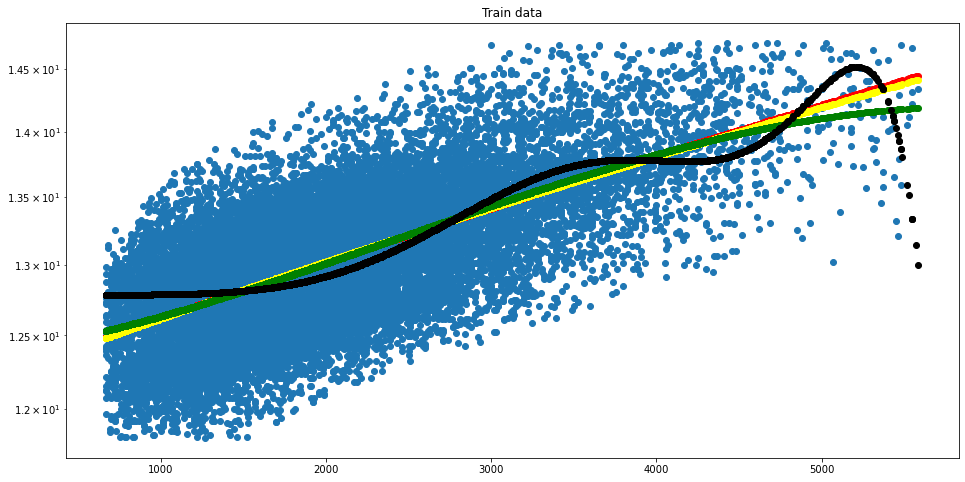

In [141]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)


poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(x)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, y)


pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.scatter(x, pred, c='red', label='Linear regression line')
plt.scatter(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(x, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(x, pred10, c='black', label='Polynomial regression line 10')
;

In [142]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

0.445420491868342 0.4454699454825579 0.4465291197981248 0.4133281016622786


We don't have enough of an improvement when moving to a 2nd degree polynomial to change our sqft_living to a polynomial relationship.

#### Sqft_living

In [ ]:
df_sqft = df['sqft_living']
df_sqft
plt.hist(df_sqft)

In [ ]:
#df_sqft = np.log(df_sqft)
#plt.hist(df_sqft)

In [ ]:
df_sqft = np.array(df_sqft)
df_sqft = df_sqft.reshape(-1,1)

In [ ]:
poly2 = PolynomialFeatures(degree=2)
sqft2 = poly2.fit_transform(df_sqft)

In [ ]:
sqft_poly = pd.DataFrame(sqft2)
sqft_poly

In [ ]:
sqft_poly.drop(0, axis=1, inplace=True)

In [ ]:
sqft_poly.rename(columns={0:'sqft_intercept',1:"sqft_1", 2:'sqft_2'}, inplace=True)

In [ ]:
scaler = StandardScaler()
sqft_poly[['sqft_1', 'sqft_2']] = scaler.fit_transform(sqft_poly[['sqft_1', 'sqft_2']])

In [ ]:
sqft_poly

## Polynomial learning stuff

In [ ]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = X_train_val['sqft_living']
X_train_poly = X_train_poly.values.reshape(-1, 1)
y_train_poly = y_train_val

X_test_poly = X_test['sqft_living']
X_test_poly = X_test_poly.values.reshape(-1, 1)
y_test_poly = y_test

In [ ]:


# fit multiple polynomial features
degrees = [1, 2, 3, 6]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
df_bins

In [ ]:
X_now = df_bins['zip_group'].astype(int)
X_now = np.log(X_now)
X_now

In [ ]:
# creating our train/validation sets and our test sets

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_now, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = np.array(X_train_poly)
X_train_poly = X_train_poly.reshape(-1, 1)
X_test_poly = np.array(X_test_poly)
X_test_poly = X_test_poly.reshape(-1, 1)

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train_poly)

In [ ]:
x_poly

In [ ]:
stuff = pd.DataFrame(x_poly)
stuff

## Decision Tree Model

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.iloc[:1000]['sqft_living']
y = preprocessed_trees.iloc[:1000]['price']

X = np.array(X)
X = X.reshape(-1, 1)

X.shape
y.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(15, 4))
plt.scatter(X, y, alpha=.7);

In [ ]:
def many_trees(n_trees, clf=False, **kwargs):
    trees = [DecisionTreeRegressor(**kwargs) for i in range(n_trees)]
    return trees

def boost(trees, X, y):
    fitted = []
    for tree in trees:
        tree.fit(X, y)
        yhat = tree.predict(X)
        y = (y-yhat) 
        fitted.append(tree)
    return fitted
        
def predict(trees, X):
    return np.array([tree.predict(X) for tree in trees])

In [ ]:
samples = X.shape[0]

learners = many_trees(samples, max_depth=1)
fitted = boost(learners, X, y)
boosted_yhat = predict(fitted, X)

xfit = np.linspace(0, 10, samples).reshape(-1, 1)

sample_ix = np.arange(X.shape[0])

def plot_fits(n_trees, row):
    preds_t = boosted_yhat[:, :n_trees]
    boosted_pred = preds_t.sum(1)
    res = boosted_pred-y
    axes[row, 0].plot(xfit, boosted_pred, c='red')
    axes[row, 0].scatter(X, y)
    axes[row, 0].set_title(f"Fit after {n_trees} trees", fontsize=15)
    axes[row, 1].scatter(sample_ix, res, alpha=0.7)
    axes[row, 1].plot(res, color='r', alpha=0.7)
    axes[row, 1].set_title(f"Residuals after {n_trees} trees", fontsize=15)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,25))
plot_fits(1, 0)
plot_fits(5, 1)
plot_fits(15, 2)
plot_fits(20, 3)
plot_fits(25, 4)
plot_fits(30, 5)

fig.tight_layout()

In [ ]:
plt.figure(figsize=(15, 4))

pred = 0
for i in range(len(learners)):
    pred += boosted_yhat[:, i]
    plt.plot(xfit, pred)
plt.plot(xfit, predict(learners, X).sum(1))
plt.xlabel("X")
plt.ylabel("y");

plt.scatter(X, y, alpha=.4);

reference: https://towardsdatascience.com/gradient-boosting-is-one-of-the-most-effective-ml-techniques-out-there-af6bfd0df342

### Data Prep - Decision Tree

Tree regressors are insensitive to feature scaling. We will build a data set for tree regressors that has our data un-scaled and unaltered.

There are a few occasions when it’s better to one-hot encode variables into k variables instead of k-1:
* When building tree-based algorithms.
* When making feature selection with recursive algorithms.
* When interested in determining the importance of every single category

In [ ]:
# no drop version for tree algorithms
processed_bins_nodrop = pd.get_dummies(df_bins[dummybins], prefix=dummybins)

In [ ]:
preprocessed_trees = pd.concat([df_target, df_discrete, df_continuous, processed_bins_nodrop, processed_cats], axis=1)

In [ ]:
# preprocessed data ready for tree-based algorithm

preprocessed_trees

### Experimenting with tree depths

In [ ]:
X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=20)
regr_5 = DecisionTreeRegressor(max_depth=30)
regr_6 = DecisionTreeRegressor(max_depth=50)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)
regr_5.fit(X_train, y_train)

regr_6.fit(X_train, y_train)

In [ ]:
predicted_2 = regr_1.predict(X_test)
predicted_5 = regr_2.predict(X_test)
predicted_10 = regr_3.predict(X_test)
predicted_20 = regr_4.predict(X_test)
predicted_30 = regr_5.predict(X_test)
predicted_50 = regr_6.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted_2": predicted_2, "Predicted_5": predicted_5, "Predicted_10": predicted_10, "Predicted_20": predicted_20, "Predicted_30": predicted_30, "Predicted_500": predicted_50})
predicted_prices


In [ ]:

round(mean_absolute_error(actual, predicted_2), 2), round(mean_absolute_error(actual, predicted_5), 2), round(mean_absolute_error(actual, predicted_10), 2), round(mean_absolute_error(actual, predicted_20), 2), round(mean_absolute_error(actual, predicted_30), 2), round(mean_absolute_error(actual, predicted_50), 2)

A tree depth somewhere in the middle gives us the best result

### To Do - 

write function that incorporates all of our learned things into one decision tree function that both looks for the best combo of features, and looks at different tree depth, and returns these for the model.

### DecisionTreeRegressor identifying feature importance without CV

Now we are studying our feature importance using a Decision Tree model. Decision trees support non-linearity, and are good when there are a lot of categorical variables. This output tells us the features that have the most weight in a Decision Tree algorithm.

The model gives us a list of important features based on how much they influenced the decision tree accuracy.

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# create the random forest with your hyperparameters.
model = DecisionTreeRegressor()

# fit the model to start training.
model.fit(X_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances', ascending=False)


final_df

Model prediction without CV with Decision Tree as our algorithm

In [ ]:
predicted_home_prices = model.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Recursive Feature Elimination with Cross Validation - Decision Tree

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X_train, y_train)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

imp_values = dset[(dset['used'] == True)]
imp_values['importance'] = rfecv.estimator_.feature_importances_
imp_values = imp_values.sort_values(by='importance', ascending=False)
imp_values

plt.figure(figsize=(16, 14))
plt.barh(y=imp_values['attr'], width=imp_values['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
predicted_home_prices = rfecv.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Visualising MAE at different features selected

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# explore the number of selected features for RFE

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(6, 37):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
model = DecisionTreeRegressor()
rfe = RFE(estimator=model, n_features_to_select=30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rfe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

rfe.fit(X_train, y_train)

print(np.mean(scores))


In [ ]:
predicted_home_prices = rfe.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

## Boosted Model

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train_val.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_val.columns.values]

X_test.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [ ]:
import xgboost as xgb

the_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)


#the_model = xgb.XGBRegressor()
the_model.fit(X_train_val, y_train_val)

In [ ]:
predicted_home_prices = np.floor(np.expm1(the_model.predict(X_test)))

In [ ]:
predicted_prices = pd.DataFrame({"Actual": test_actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(test_actual, predicted_home_prices), 2)